57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Epoch 1/100


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 526.2173 - mae: 20.7708 - val_loss: 293.6018 - val_mae: 14.7892
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168.3674 - mae: 10.4698 - val_loss: 124.2536 - val_mae: 8.4674
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.1412 - mae: 6.3422 - val_loss: 39.7037 - val_mae: 4.7383
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.2221 - mae: 4.3507 - val_loss: 27.4270 - val_mae: 4.0510
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.7363 - mae: 3.5739 - val_loss: 22.4567 - val_mae: 3.4431
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3734 - mae: 3.0003 - val_loss: 20.5888 - val_mae: 3.3247
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.0096 - mae: 3.0361 - val_loss: 21.5569 - val_mae: 3.2252
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.8709 - mae: 3.0522 - val_loss: 19.0019 - val_mae: 3.0450
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

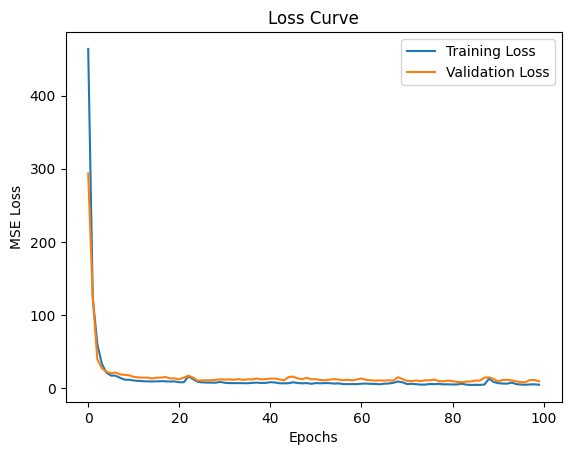

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Linear activation for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest MAE: {mae:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()
